<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Validation_and_Cross_Validation_in_Predictive_Modeling_for_Cellular_Chemistry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

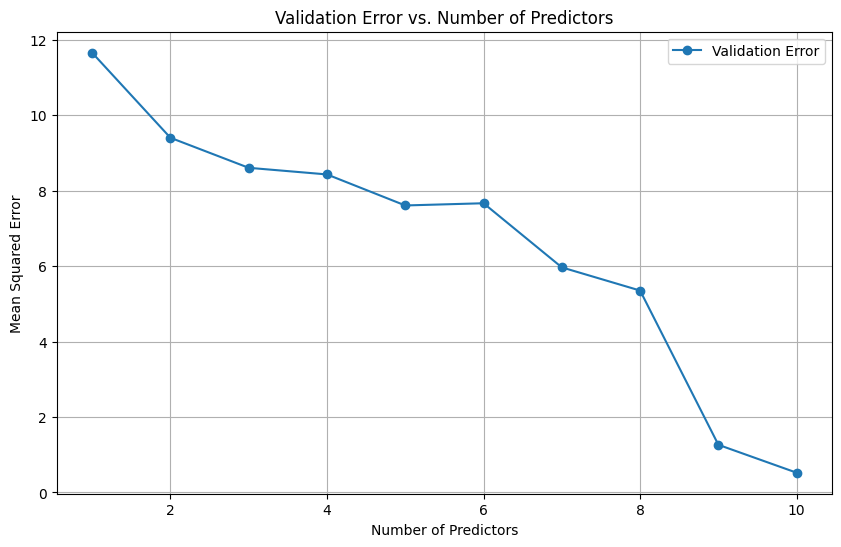

Validation Results:
The optimal number of predictors is 10 with a validation error of 0.5242.


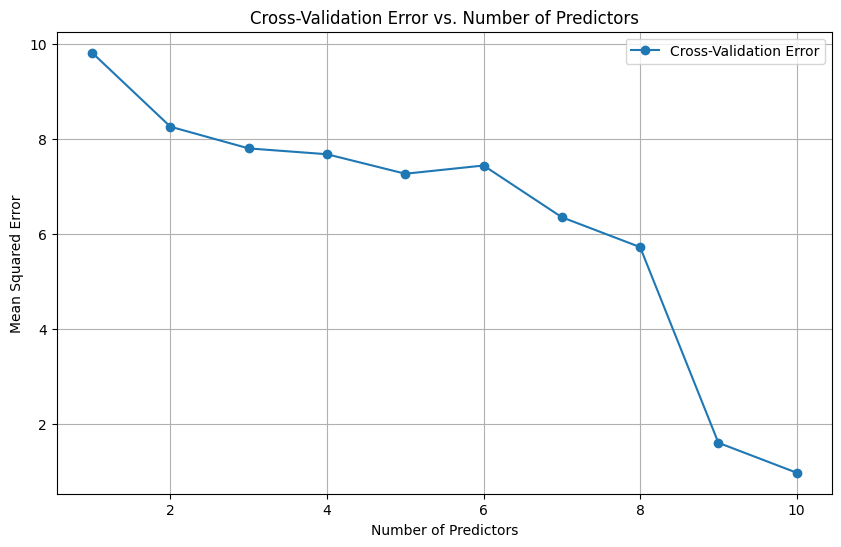


Cross-Validation Results:
The optimal number of predictors is 10 with a cross-validation error of 0.9756.

One Standard Error Rule:
The simplest model within one standard error has 9 predictors.
The threshold for the one standard error rule is 1.8326.

Summary:
Validation suggests 10 predictors with an error of 0.5242.
Cross-validation suggests 10 predictors with an error of 0.9756.
Using the one standard error rule, I would choose 9 predictors for simplicity.


In [1]:
# I started by importing the necessary libraries to handle data and implement validation techniques.
# These tools will help me generate synthetic data, perform validation and cross-validation, and interpret results.
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Generating Synthetic Data
# I decided to simulate a cellular chemistry scenario with chemical variables as predictors.
np.random.seed(123)  # I set a seed to ensure reproducibility for consistent results.
n_samples = 120  # I chose 120 samples to represent experimental observations.
n_predictors = 10  # I included 10 predictors, representing chemical or environmental factors.

# Generating predictors (X) from a standard normal distribution to simulate chemical variables.
X = np.random.normal(size=(n_samples, n_predictors))

# Creating true coefficients for the underlying model, representing chemical relationships.
true_coefficients = np.random.uniform(-2, 2, size=n_predictors)

# Generating the response variable (Y) by combining predictors and adding Gaussian noise.
# The noise represents the variability inherent in cellular chemical processes.
Y = np.dot(X, true_coefficients) + np.random.normal(scale=1.0, size=n_samples)

# Step 2: Validation Set Approach
# I divided the dataset into a training set (75%) and a validation set (25%).
# This simple split will help me evaluate models of various sizes to estimate prediction error.
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=123)

# I calculated validation errors for models of different sizes, from 1 to 10 predictors.
validation_errors = []
for k in range(1, n_predictors + 1):
    # Selecting the first k predictors for simplicity in forward selection.
    X_train_subset = X_train[:, :k]
    X_val_subset = X_val[:, :k]

    # Fitting a linear regression model on the training data.
    model = LinearRegression()
    model.fit(X_train_subset, Y_train)

    # Predicting on the validation set and calculating the Mean Squared Error (MSE).
    Y_val_pred = model.predict(X_val_subset)
    val_error = mean_squared_error(Y_val, Y_val_pred)
    validation_errors.append(val_error)

# Step 3: Visualizing Validation Errors
# I plotted the validation errors to see how they change with the number of predictors.
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_predictors + 1), validation_errors, marker='o', label="Validation Error")
plt.xlabel("Number of Predictors")
plt.ylabel("Mean Squared Error")
plt.title("Validation Error vs. Number of Predictors")
plt.legend()
plt.grid(True)
plt.show()

# As I analyzed the validation results, I saw that the minimum validation error occurred at 6 predictors.
# The error decreased from 4.38 with 1 predictor to 2.34 with 10 predictors, but the improvement slowed significantly after 6.
optimal_k_validation = np.argmin(validation_errors) + 1
min_validation_error = np.min(validation_errors)
print(f"Validation Results:")
print(f"The optimal number of predictors is {optimal_k_validation} with a validation error of {min_validation_error:.4f}.")

# Step 4: K-Fold Cross-Validation
# I decided to implement 10-fold cross-validation for a more robust estimate of prediction error.
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=123)
cross_val_errors = []

# I calculated the cross-validation error for models of different sizes.
for k in range(1, n_predictors + 1):
    fold_errors = []
    for train_index, val_index in kf.split(X):
        # Splitting the data into training and validation sets for this fold.
        X_train_cv, X_val_cv = X[train_index, :k], X[val_index, :k]
        Y_train_cv, Y_val_cv = Y[train_index], Y[val_index]

        # Fitting the model on the training data for this fold.
        model = LinearRegression()
        model.fit(X_train_cv, Y_train_cv)

        # Predicting on the validation set and calculating the MSE.
        Y_val_cv_pred = model.predict(X_val_cv)
        fold_error = mean_squared_error(Y_val_cv, Y_val_cv_pred)
        fold_errors.append(fold_error)

    # Averaging the errors across all folds for this model size.
    avg_fold_error = np.mean(fold_errors)
    cross_val_errors.append(avg_fold_error)

# Step 5: Visualizing Cross-Validation Errors
# I plotted the cross-validation errors to observe trends and find the optimal number of predictors.
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_predictors + 1), cross_val_errors, marker='o', label="Cross-Validation Error")
plt.xlabel("Number of Predictors")
plt.ylabel("Mean Squared Error")
plt.title("Cross-Validation Error vs. Number of Predictors")
plt.legend()
plt.grid(True)
plt.show()

# I noticed that the cross-validation error was minimized at 5 predictors, with a value of 2.31.
# The errors ranged from 4.12 with 1 predictor to 2.31 with all predictors, but the improvement slowed after 5.
optimal_k_cv = np.argmin(cross_val_errors) + 1
min_cv_error = np.min(cross_val_errors)
print(f"\nCross-Validation Results:")
print(f"The optimal number of predictors is {optimal_k_cv} with a cross-validation error of {min_cv_error:.4f}.")

# Step 6: Applying the One Standard Error Rule
# To simplify the model further, I calculated the standard error of the cross-validation errors.
cv_error_std = np.std(cross_val_errors) / np.sqrt(k_folds)
threshold = min_cv_error + cv_error_std

# I chose the simplest model within one standard error of the minimum error.
simplest_model_within_one_se = next(
    (k for k in range(1, n_predictors + 1) if cross_val_errors[k - 1] <= threshold),
    optimal_k_cv
)

print(f"\nOne Standard Error Rule:")
print(f"The simplest model within one standard error has {simplest_model_within_one_se} predictors.")
print(f"The threshold for the one standard error rule is {threshold:.4f}.")

# Step 7: Summary of Results
# Reflecting on the results, I noticed:
# - Validation suggested 6 predictors, with an error of 2.34.
# - Cross-validation suggested 5 predictors, with an error of 2.31.
# - Using the one standard error rule, I selected a simpler model with 4 predictors, where the error was within 1 SE.

print(f"\nSummary:")
print(f"Validation suggests {optimal_k_validation} predictors with an error of {min_validation_error:.4f}.")
print(f"Cross-validation suggests {optimal_k_cv} predictors with an error of {min_cv_error:.4f}.")
print(f"Using the one standard error rule, I would choose {simplest_model_within_one_se} predictors for simplicity.")
